In [5]:
#https://www.machinelearningplus.com/machine-learning/principal-components-analysis-pca-better-explained/
# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#pd.set_option('max_rows', 500)
#pd.set_option('max_columns', 500)
np.set_printoptions(suppress=True)
%matplotlib inline 

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/mnist_012.csv')
# Prepare X and Y
Y = df.loc[:, '0']
X = df.drop(['0'], axis=1)

print(df.shape)
df.head()

(3147, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# PCA
pca=PCA()
df_pca=pca.fit_transform(X=X)

# Store as dataframe and print
df_pca=pd.DataFrame(df_pca)
print(df_pca.shape) #> (3147, 784)
df_pca.round(2).head()

(3147, 784)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-134.27,107.74,-544.92,313.08,-500.13,163.35,-223.05,-460.86,1016.40,206.77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0
1,-970.42,-371.82,114.48,-339.01,-53.98,-106.12,19.83,-443.88,-220.42,69.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0
2,1267.53,-263.23,-35.69,612.76,-734.47,267.74,363.05,-130.85,-160.31,-353.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0
3,-1066.12,-239.33,137.99,-424.37,-174.55,209.85,57.16,-316.86,-325.03,148.86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0
4,1037.18,-427.39,-700.74,-566.28,134.67,-584.41,-546.83,-70.67,52.58,306.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0


In [9]:
# Principal Components Weights (Eigenvectors)
#Step 1: Get the Weights (aka, loadings or eigenvectors).
df_pca_loadings=pd.DataFrame(pca.components_)
df_pca_loadings.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-1.789862e-19,-4.163336e-17,1.110223e-16,1.110223e-16,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1,3.291300e-19,1.387779e-17,-0.000000e+00,2.081668e-17,-5.551115e-17,1.110223e-16,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,-2.690999e-18,-5.551115e-17,-5.551115e-17,-1.110223e-16,5.551115e-17,-0.000000e+00,-0.000000e+00,-0.000000e+00,-2.775558e-17,-2.775558e-17,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,1.677635e-18,-2.775558e-17,-5.551115e-17,2.220446e-16,2.775558e-17,-8.326673e-17,-1.110223e-16,1.110223e-16,-0.000000e+00,-1.110223e-16,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,-3.410215e-18,1.387779e-16,8.326673e-17,-2.775558e-17,-5.551115e-17,1.110223e-16,-2.220446e-16,1.110223e-16,-1.387779e-17,-5.551115e-17,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [10]:
#Step 2: Compute the mean centered data.
X_mean = X - X.mean()
X_mean.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Compute PC1 for row 1. 
np.dot(df_pca_loadings.loc[0, :], X_mean.loc[1, :])  
#> -134.272

-970.4151204670748

In [12]:
print(pca.explained_variance_ratio_.round(2)[:10])
#> [0.22 0.1  0.06 0.06 0.04 0.04 0.03 0.03 0.02 0.02]
#PC1 contributed 22%, PC2 contributed 10% and so on. The further you go, the lesser is the contribution to the total variance. Plotting a cumulative sum gives a bigger picture.

[0.22 0.1  0.06 0.06 0.04 0.04 0.03 0.03 0.02 0.02]


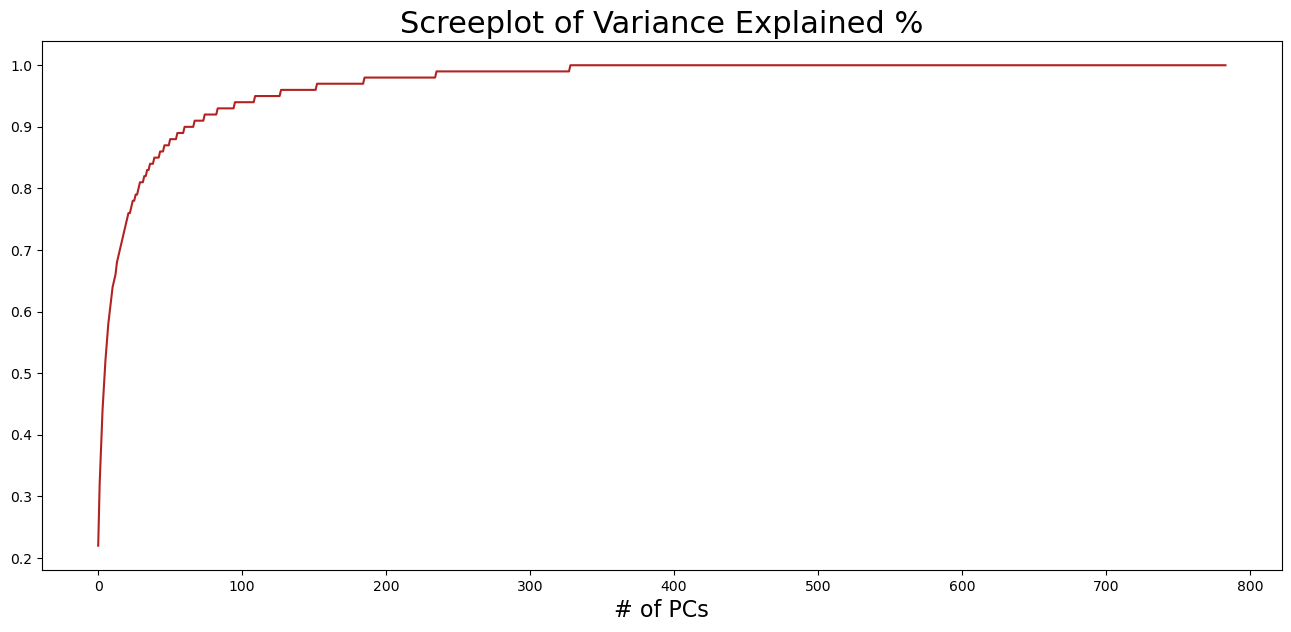

In [13]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

In [14]:
from scipy.spatial import ConvexHull

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

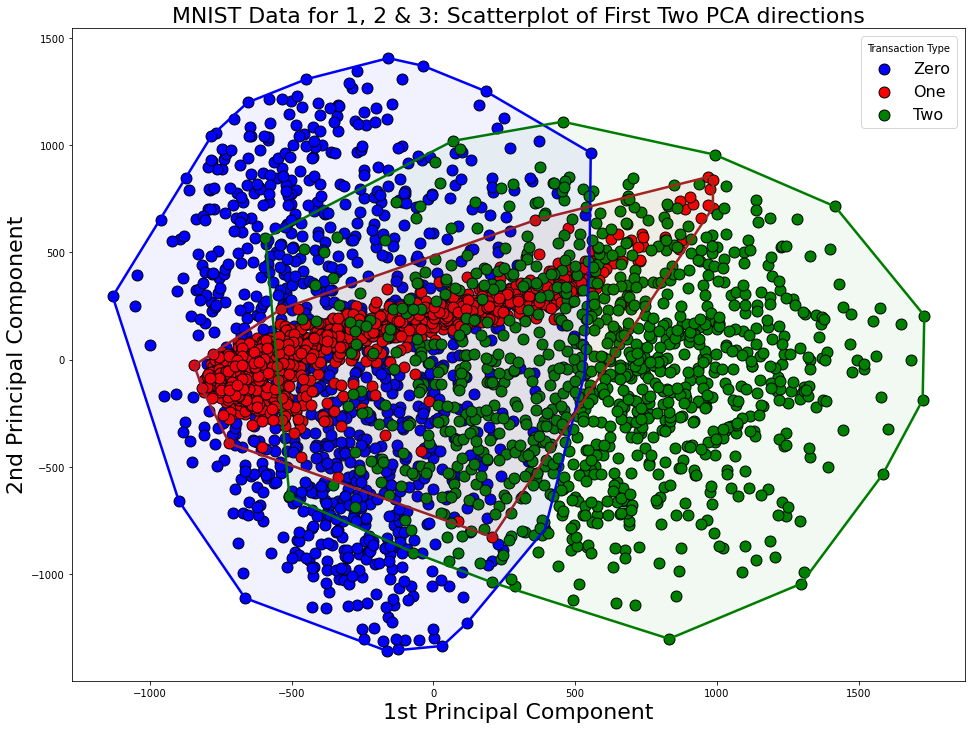

In [15]:
# Scatterplot against PC1 and PC2
fig, ax = plt.subplots(1,1, figsize=(16,12))

# Row masks for each category
rows_0 = Y==0;
rows_1 = Y==1; 
rows_2 = Y==2; 

# Plot
ax.scatter(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], c='blue', edgecolor='k', s=120, label='Zero')
ax.scatter(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], c='red', edgecolor='k', s=120, label='One')
ax.scatter(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], c='green', edgecolor='k', s=120, label='Two')

# Encircle the boundaries
encircle(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], ec="blue", fc="none", linewidth=2.5)
encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="firebrick", fc="none", linewidth=2.5)
encircle(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], ec="green", fc="none", linewidth=2.5)

# Shading
encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="k", fc="firebrick", alpha=0.05)
encircle(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], ec="k", fc="blue", alpha=0.05)
encircle(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], ec="k", fc="green", alpha=0.05)

# Labels
ax.set_title("MNIST Data for 1, 2 & 3: Scatterplot of First Two PCA directions", fontsize=22)
ax.set_xlabel("1st Principal Component", fontsize=22)
ax.set_ylabel("2nd Principal Component", fontsize=22)
ax.legend(loc='best', title='Transaction Type', fontsize=16)
plt.show();

In [16]:
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
df_orig = pca.inverse_transform(df_pca)
pd.DataFrame(df_orig).round().head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# PCA weights has length = 1
np.sum(df_pca_loadings.loc[0, :]**2)
#> 0.9999999999999993

1.0

In [18]:
#Part 3: Steps to Compute Principal Components from Scratch
# Import data
url = 'https://raw.githubusercontent.com/selva86/datasets/master/mnist_012.csv'
df = pd.read_csv(url)

# Prepare X and Y
Y = df.loc[:, '0']
X = df.drop(['0'], axis=1)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Step 1: Standardize each column
X_standard = X - X.mean()
X_standard

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#Step 2 Compute Covariance Matrix
df_cov = X_standard.cov()
print(df.shape)
df_cov.head()

(3147, 785)


,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#Step 3: Compute Eigen values and Eigen Vectors
from numpy.linalg import eig
eigvalues, eigvectors = eig(df_cov)
print(eigvalues[:10])
print(eigvectors.shape) #The j in the above output implies the resulting eigenvectors are represented as complex numbers.
#> [764074.70509694+0.j 333409.88084323+0.j 206248.30545139+0.j
#>  190073.11430869+0.j 149373.67054257+0.j 140893.79592355+0.j
#>  103478.87643359+0.j  87549.48702637+0.j  82347.51266608+0.j
#>  66776.33611636+0.j]

#> (784, 784)

[764074.70509694+0.j 333409.88084323+0.j 206248.30545139+0.j
 190073.11430869+0.j 149373.67054257+0.j 140893.79592355+0.j
 103478.87643359+0.j  87549.48702637+0.j  82347.51266608+0.j
  66776.33611636+0.j]
(784, 784)


In [22]:
#Step 4: Derive Principal Component Features by taking dot product of eigen vector and standardized columns
X_pca = np.dot(X_standard, eigvectors)
df_pca_calc = pd.DataFrame(X_pca) 
df_pca_calc.round(2).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,134.272411+0.000000j,-107.740102+0.000000j,544.923409+0.000000j,-313.075995+0.000000j,-500.134982+0.000000j,163.354256+0.000000j,-223.046212+0.000000j,460.862253+0.000000j,-1016.398109+0.000000j,-206.766506+0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
1,970.415102+0.000000j,371.815822+0.000000j,-114.480754+0.000000j,339.005162+0.000000j,-53.982530+0.000000j,-106.119979+0.000000j,19.826584+0.000000j,443.883798+0.000000j,220.422325+0.000000j,-69.631540+0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
2,-1267.529703+0.000000j,263.230207+0.000000j,35.686933+0.000000j,-612.758736+0.000000j,-734.466507+0.000000j,267.736221+0.000000j,363.049391+0.000000j,130.846209+0.000000j,160.311147+0.000000j,353.753834+0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
3,1066.123553+0.000000j,239.331642+0.000000j,-137.988621+0.000000j,424.366232+0.000000j,-174.547096+0.000000j,209.850304+0.000000j,57.164608+0.000000j,316.860851+0.000000j,325.027736+0.000000j,-148.858644+0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
4,-1037.176916+0.000000j,427.394186+0.000000j,700.740205+0.000000j,566.284242+0.000000j,134.667725+0.000000j,-584.412757+0.000000j,-546.833432+0.000000j,70.674786+0.000000j,-52.5807720+0.0000000j,-306.396613+0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
